## Loading the data


In [5]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('Data.pkl')
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


## Splitting the Data into Training and Testing

In [2]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


## Creating Deep Learning- Artificial Neural Networks(ANN) model

In [6]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 10, verbose=1)

Epoch 1/10
201/201 [==============================] - 1s 2ms/step - loss: 0.8451
Epoch 2/10
201/201 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 3/10
201/201 [==============================] - 0s 2ms/step - loss: 0.2016
Epoch 4/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1782
Epoch 5/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1621
Epoch 6/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1509
Epoch 7/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 8/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 9/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 10/10
201/201 [==============================] - 0s 2ms/step - loss: 0.1273


## Finding best set of parameters using manual grid search

In [8]:
import warnings
# Ignore a specific warning by category
warnings.filterwarnings("ignore", category=FutureWarning)

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

14/14 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 43.05748804666538
14/14 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 39.516466717517716
14/14 [==============================] - 0s 3ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 63.95594951598872
14/14 [==============================] - 0s 3ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 57.14415434027104
14/14 [==============================] - 0s 3ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 27.979352054347643
14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 43.647148488022154
14/14 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 61.6441749240816
14/14 [==============================] - 0s 4ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 63.93272822851764
14/14 [===========

## Plotting the parameter trial results

<AxesSubplot:xlabel='Parameters'>

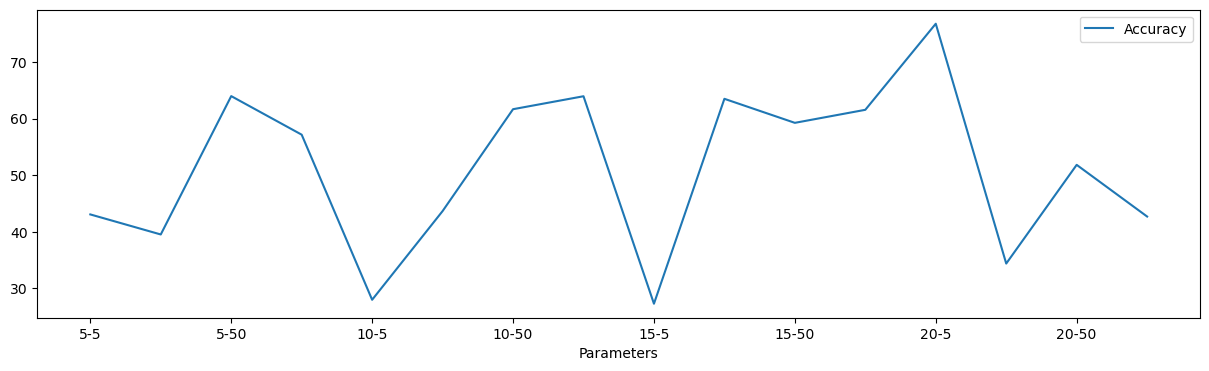

In [9]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Training the ANN model with the best parameters

In [10]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 2ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9728.354492
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9845.012695
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8647.952148
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9241.170898
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8937.857422


## Finding the accuracy of the model

In [11]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 90.88910401980263


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9728.354492,2.227593
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9845.012695,23.139621
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8647.952148,15.306029
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9241.170898,7.123911
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8937.857422,0.135671


## Finding best hyperparameters using GridSearchCV.

In [16]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

# Defining a custom function to calculate accuracy 
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Listing all the parameters to try
Parameter_Trials = {'batch_size': [10, 20, 30],
                    'epochs': [10, 20],
                    'Optimizer_trial': ['adam', 'rmsprop']
                   }

# Creating the regression ANN model
RegModel = KerasRegressor(make_regression_ann, verbose=0)

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Creating the Grid search space
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)
grid_search = GridSearchCV(estimator=RegModel, 
                           param_grid=Parameter_Trials, 
                           scoring=custom_Scoring, 
                           cv=5)

# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters
grid_search.fit(X, y, verbose=0)

EndTime = time.time()
print("########## Total Time Taken: ", round((EndTime - StartTime) / 60), 'Minutes')

print('### Printing Best parameters ###')
print(grid_search.best_params_)


C:\Users\ATA UMER\AppData\Local\Temp\ipykernel_7104\4078394867.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel = KerasRegressor(make_regression_ann, verbose=0)


########## Total Time Taken:  4 Minutes
### Printing Best parameters ###
{'Optimizer_trial': 'adam', 'batch_size': 30, 'epochs': 10}
